<a href="https://colab.research.google.com/github/bondpy202212/AI_projects/blob/main/_10__NLP_Models_with_LSTM_Conv1D_Sarcasm_Dataset(Kaggle_News_Headlines)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence  import pad_sequences

**Download the Dataset**\
https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection \
This News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

!unzip news-headlines-dataset-for-sarcasm-detection.zip

In [ ]:
# Load the JSON file
with open("./Sarcasm_Headlines_Dataset.json", 'r') as f:
    datastore = [json.loads(line) for line in f]

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

**Split the Dataset**

In [ ]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

**Data preprocessing**

In [ ]:
vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length,
                               padding=padding_type,
                               truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

**Build and Compile the Model**

In [ ]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          12,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,129 (680.19 KB)

 Trainable params: 174,129 (680.19 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [ ]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded,
                              training_labels,
                              epochs=NUM_EPOCHS,
                              validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 87ms/step - accuracy: 0.7013 - loss: 0.5349 - val_accuracy: 0.8506 - val_loss: 0.3403
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 99ms/step - accuracy: 0.9105 - loss: 0.2210 - val_accuracy: 0.8539 - val_loss: 0.3468
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9527 - loss: 0.1321 - val_accuracy: 0.8538 - val_loss: 0.3845
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.9735 - loss: 0.0816 - val_accuracy: 0.8509 - val_loss: 0.4872
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.9863 - loss: 0.0453 - val_accuracy: 0.8439 - val_loss: 0.5999
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 84ms/step - accuracy: 0.9916 - loss: 0.0292 - val_accuracy: 0.8359 - val_loss: 0.6750
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.9936 - loss: 0.0214 - val_accuracy: 0.8351 - val_loss: 0.8444
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.9956 - loss: 0.0147 -

**Plot Utility**

In [ ]:
# Plot Utility
def plot_graphs(history, string, title):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.grid(True)
  plt.title(title)
  plt.show()

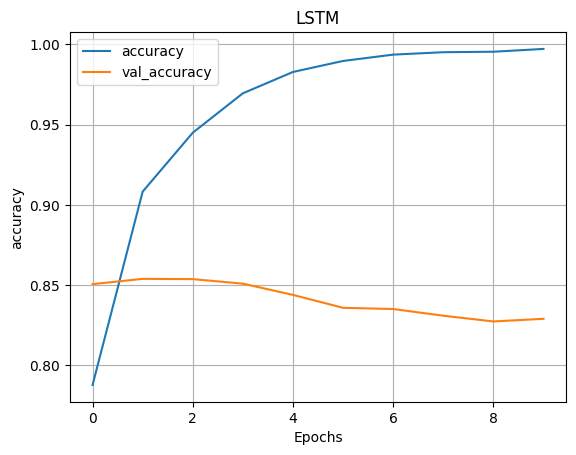

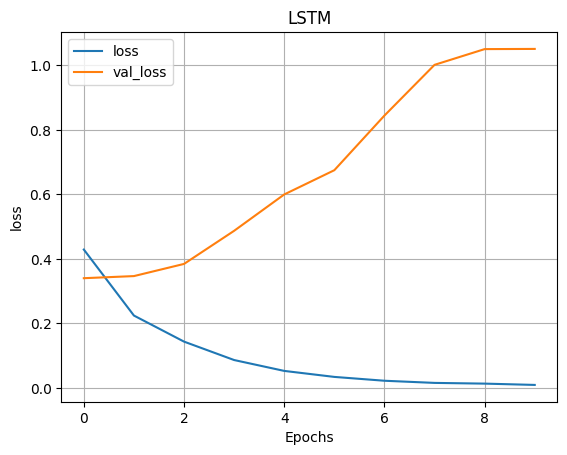

In [ ]:
# Plot the accuracy and loss history
title = 'LSTM'
plot_graphs(history_lstm, 'accuracy', title)
plot_graphs(history_lstm, 'loss', title)

**Model: Convolution**

In [ ]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 116, 128)            │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,149 (668.55 KB)

 Trainable params: 171,149 (668.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history_conv = model_conv.fit(training_padded,
                              training_labels,
                              epochs=NUM_EPOCHS,
                              validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6854 - loss: 0.5627 - val_accuracy: 0.8423 - val_loss: 0.3637
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9068 - loss: 0.2402 - val_accuracy: 0.8468 - val_loss: 0.3679
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9546 - loss: 0.1319 - val_accuracy: 0.8413 - val_loss: 0.4372
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9833 - loss: 0.0641 - val_accuracy: 0.8380 - val_loss: 0.5237
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9931 - loss: 0.0279 - val_accuracy: 0.8290 - val_loss: 0.6569
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9974 - loss: 0.0131 - val_accuracy: 0.8357 - val_loss: 0.7632
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.8271 - val_loss: 0.8512
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9997 - loss: 0.0026 - v

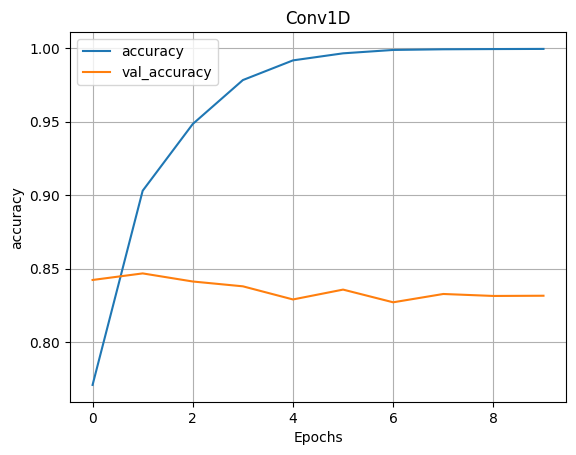

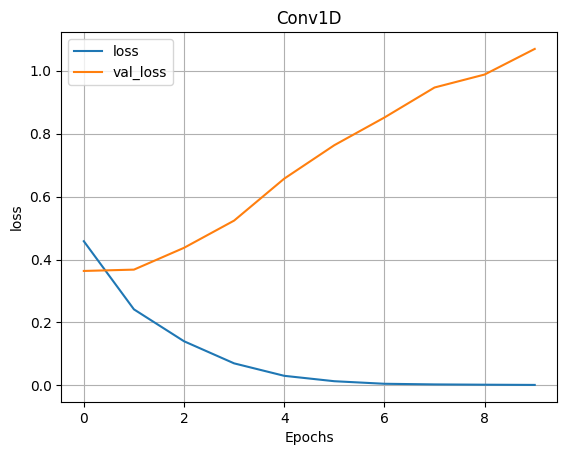

In [ ]:
# Plot the accuracy and loss history
title = 'Conv1D'
plot_graphs(history_conv, 'accuracy', title)
plot_graphs(history_conv, 'loss', title)